In [25]:
##UCB Project 1

In [26]:
#Dependencies & Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go

In [27]:
##Importing raw data and formatting into dataframes
fat_data = pd.read_csv(("Raw Data/Fat_Supply_Quantity_Data.csv"))
protein_data = pd.read_csv("Raw Data/Protein_Supply_Quantity_Data.csv")
calorie_data = pd.read_csv("Raw Data/Food_Supply_kcal_Data.csv")
weight_data = pd.read_csv("Raw Data/Food_Supply_Quantity_kg_Data.csv")

In [28]:
###Data Cleaning
##Removing non-values
fat_data = fat_data.dropna(subset=["Obesity","Confirmed","Undernourished"])
protein_data = protein_data.dropna(subset=["Obesity","Confirmed","Undernourished"])
calorie_data = calorie_data.dropna(subset=["Obesity","Confirmed","Undernourished"])
weight_data = weight_data.dropna(subset=["Obesity","Confirmed","Undernourished"])

In [38]:
##COnverting values to numerical
df = fat_data.copy()

# Replace '>2.5' with '2.5' and 'NA' with NaN (missing data)
df['Undernourished'] = df['Undernourished'].replace('<2.5', '2.5')

# Convert the column to numeric
df['Undernourished'] = pd.to_numeric(df['Undernourished'], errors='coerce')

In [36]:
#View reamining data
fat_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, 0 to 169
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       156 non-null    object 
 1   Alcoholic Beverages           156 non-null    float64
 2   Animal Products               156 non-null    float64
 3   Animal fats                   156 non-null    float64
 4   Aquatic Products, Other       156 non-null    float64
 5   Cereals - Excluding Beer      156 non-null    float64
 6   Eggs                          156 non-null    float64
 7   Fish, Seafood                 156 non-null    float64
 8   Fruits - Excluding Wine       156 non-null    float64
 9   Meat                          156 non-null    float64
 10  Miscellaneous                 156 non-null    float64
 11  Milk - Excluding Butter       156 non-null    float64
 12  Offals                        156 non-null    float64
 13  Oilcrops  

In [32]:
##Creating Global Average Values
gaverage_obesity = fat_data["Obesity"].mean()
gaverage_confirmed = fat_data["Confirmed"].mean()
gaverage_deaths = fat_data["Deaths"].mean()
gaverage_recovered = fat_data["Recovered"].mean()
gaverage_active = fat_data["Active"].mean()

In [33]:
##Creating variables for columns of interest
obesity = fat_data["Obesity"]
confirmed = fat_data["Confirmed"]
deaths = fat_data["Deaths"]
recovered = fat_data["Recovered"]
active = fat_data["Active"]

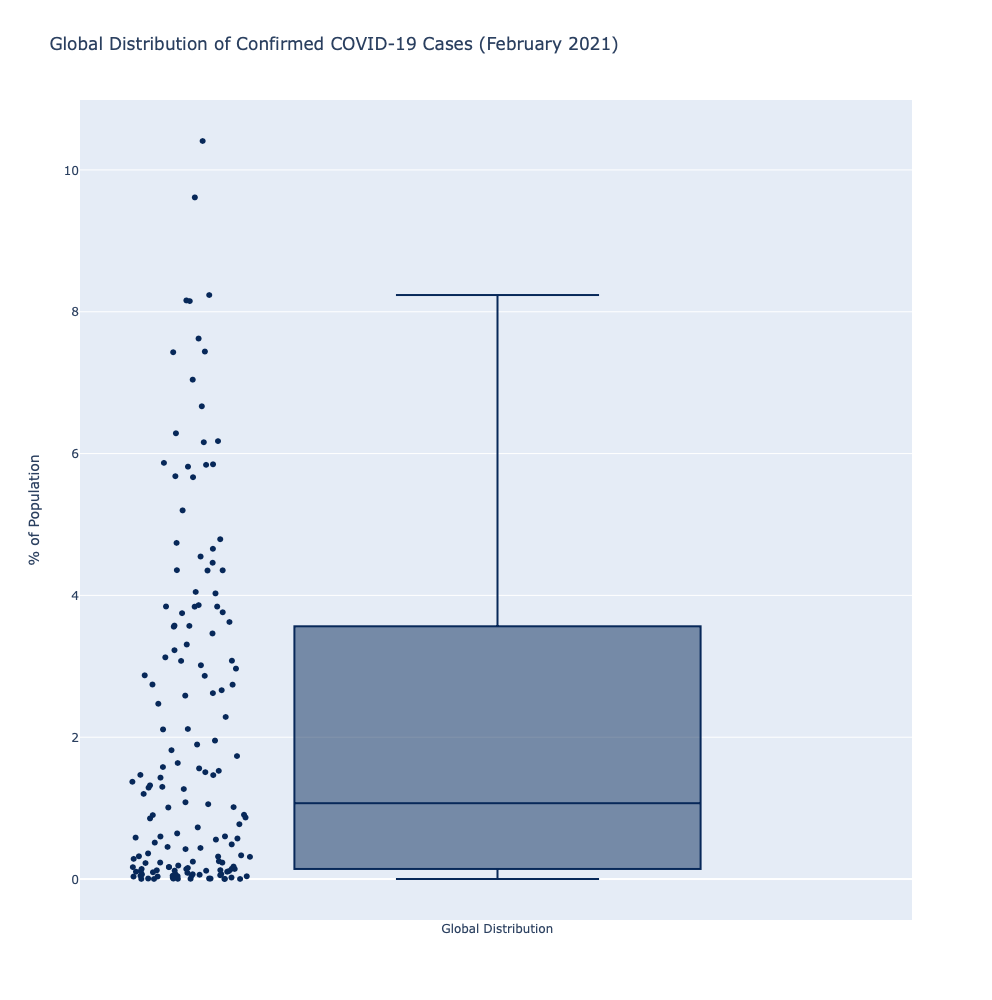


    This chart shows the distribution of COVID-19 rates for each country with available data.
    There are two outliers in the data: Montenegro with a COVID-19 rate of 10.4% and Czechia with a COVID-19 rate of 9.61%.
    The country with the highest COVID-19 rate is Montenegro with a COVID-19 rate of 10.4%.
    The country with the lowest COVID-19 rate is Vanuatu with a COVID-19 rate of 0.0003%.
    
Shapiro-Wilk Test - Statistic: 0.8246878385543823, p-value: 2.1542800095891712e-12
Mean: 2.071899805568779
Median: 1.0693387617233951
Range: 10.407887830433449
The variance for COVID-19 rates is 5.653164664208265
The standard deviation for COVID-19 rates is 2.377638463729981
Roughly 68% of the data is between -0.306 and 4.45
Roughly 95% of the data is between -2.683 and 6.827
Roughly 99.7% of the data is between -5.061 and 9.205


In [34]:
###ANTHONY CODE
##Analysis of Confirmed COVID data
confirmed_fig = go.Figure()

confirmed_fig.add_trace(go.Box(
    y=confirmed, 
    customdata=fat_data["Country"],
    boxpoints='all',
    marker_color='rgb(7,40,89)',
    line_color='rgb(7,40,89)',
    hovertemplate='Country: %{customdata}<br>Confirmed %{y}%<br>',
))

confirmed_fig.update_layout(width=1000, height=1000, 
                  title="Global Distribution of Confirmed COVID-19 Cases (February 2021)", 
                  yaxis_title="% of Population")

confirmed_fig.update_traces(name='Global Distribution')

confirmed_fig.show()
print("""
    This chart shows the distribution of COVID-19 rates for each country with available data.
    There are two outliers in the data: Montenegro with a COVID-19 rate of 10.4% and Czechia with a COVID-19 rate of 9.61%.
    The country with the highest COVID-19 rate is Montenegro with a COVID-19 rate of 10.4%.
    The country with the lowest COVID-19 rate is Vanuatu with a COVID-19 rate of 0.0003%.
    """)

##Normality Test
shapiro_test_stat, shapiro_p_value = stats.shapiro(confirmed)
print(f"Shapiro-Wilk Test - Statistic: {shapiro_test_stat}, p-value: {shapiro_p_value}")

##Summary Stats for COVID
mean_covid = np.mean(confirmed)
median_covid = np.median(confirmed)
mode_covid = stats.mode(confirmed)
range_covid = np.ptp(confirmed)


print(f"Mean: {mean_covid}")
print(f"Median: {median_covid}")
print(f"Range: {range_covid}")


##Calculate the variance and standard deviation for COVID
var_numpy = np.var(confirmed,ddof = 0)
sd_numpy = np.std(confirmed,ddof = 0)

print(f"The variance for COVID-19 rates is {var_numpy}")
print(f"The standard deviation for COVID-19 rates is {sd_numpy}")
print(f"Roughly 68% of the data is between {round(gaverage_confirmed-sd_numpy,3)} and {round(gaverage_confirmed+sd_numpy,3)}")
print(f"Roughly 95% of the data is between {round(gaverage_confirmed-2*sd_numpy,3)} and {round(gaverage_confirmed+2*sd_numpy,3)}")
print(f"Roughly 99.7% of the data is between {round(gaverage_confirmed-3*sd_numpy,3)} and {round(gaverage_confirmed+3*sd_numpy,3)}")

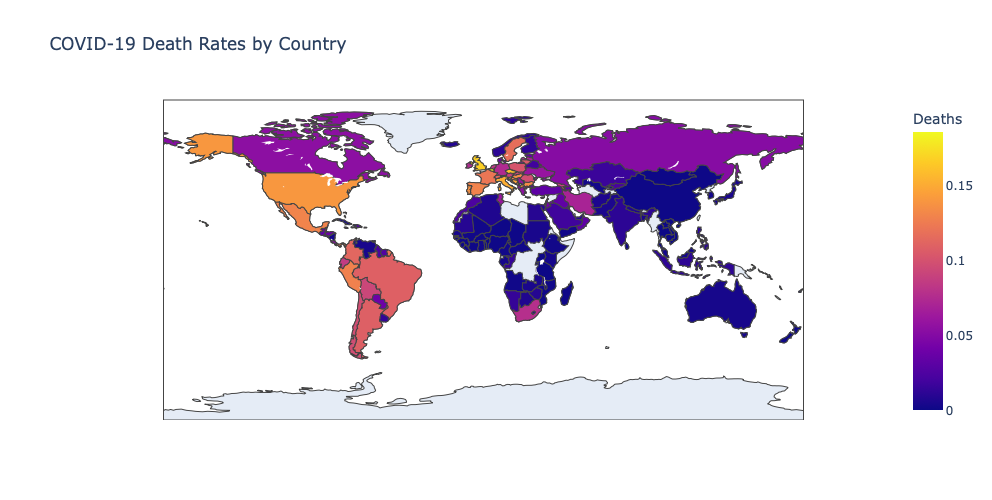

This heat map shows the distribution of COVID-19 deaths for each country with available data.

The two outliers in this dataset are:
    Country    Deaths
14  Belgium  0.185428

The 3 countries wih the highest rates of COVID-19 deaths are: 
            Country    Deaths
14          Belgium  0.185428
138        Slovenia  0.171755
159  United Kingdom  0.167220

The 3 countries wih the lowest rates of COVID-19 deaths are: 
                             Country  Deaths
24                          Cambodia     0.0
41                          Dominica     0.0
85  Lao People's Democratic Republic     0.0

Shapiro-Wilk Test - Statistic: 0.7936592102050781, p-value: 1.4726930883546957e-13

Mean: 0.04034014651111908
Median: 0.013165676252616401
Range: 0.185427702996092

The variance for COVID-19 deaths is 0.002404361373780266
The standard deviation for COVID-19 deaths is 0.04903428773603494
Roughly 68% of the data is between -0.009 and 0.089
Roughly 95% of the data is between -0.058 and 0.138
Rou

In [39]:
###IRIS CODE
###Analysis of deaths data
## create a map showing data
deaths_fig = px.choropleth(fat_data,
                    locations="Country",
                    locationmode="country names",
                    color="Deaths",
                    hover_name="Country",
                    color_continuous_scale="Plasma",
                    title="COVID-19 Death Rates by Country")
deaths_fig.update_layout(width=1000, height=500)
deaths_fig.update_traces(name='Global Distribution')
deaths_fig.show()
## find outliers
#Calculate Q1, Q3, and IQR
Q1 = df['Deaths'].quantile(0.25)
Q3 = df['Deaths'].quantile(0.75)
IQR = Q3 - Q1
#Define the threshold for outliers
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR
#Identify outliers
outliers = df[(df['Deaths'] < lower_threshold) | (df['Deaths'] > upper_threshold)]
## find top 3 and bottom 3 rates
#Get the highest 3 values
highest_3 = df.nlargest(3, 'Deaths')
#Get the lowest 3 values
lowest_3 = df.nsmallest(3, 'Deaths')
## chart description
print("This heat map shows the distribution of COVID-19 deaths for each country with available data.")
## Print the outliers and top and bottom 3
print()
print("The two outliers in this dataset are:")
print(outliers[['Country', 'Deaths']])
print()
print("The 3 countries wih the highest rates of COVID-19 deaths are: ")
print(highest_3[['Country', 'Deaths']])
print()
print("The 3 countries wih the lowest rates of COVID-19 deaths are: ")
print(lowest_3[['Country', 'Deaths']])
## Normality Test
shapiro_test_stat, shapiro_p_value = stats.shapiro(deaths)
print()
print(f"Shapiro-Wilk Test - Statistic: {shapiro_test_stat}, p-value: {shapiro_p_value}")
## Summary Stats for COVID
mean_deaths = np.mean(deaths)
median_deaths = np.median(deaths)
mode_deaths = stats.mode(deaths)
range_deaths = np.ptp(deaths)
#print summary statistics
print()
print(f"Mean: {mean_deaths}")
print(f"Median: {median_deaths}")
print(f"Range: {range_deaths}")
## Calculate the variance and standard deviation for COVID
var_deaths = np.var(deaths,ddof = 0)
sd_deaths = np.std(deaths,ddof = 0)
#print the variance and standard deviation
print()
print(f"The variance for COVID-19 deaths is {var_deaths}")
print(f"The standard deviation for COVID-19 deaths is {sd_deaths}")
print(f"Roughly 68% of the data is between {round(gaverage_deaths-sd_deaths,3)} and {round(gaverage_deaths+sd_deaths,3)}")
print(f"Roughly 95% of the data is between {round(gaverage_deaths-2*sd_deaths,3)} and {round(gaverage_deaths+2*sd_deaths,3)}")
print(f"Roughly 99.7% of the data is between {round(gaverage_deaths-3*sd_deaths,3)} and {round(gaverage_deaths+3*sd_deaths,3)}")

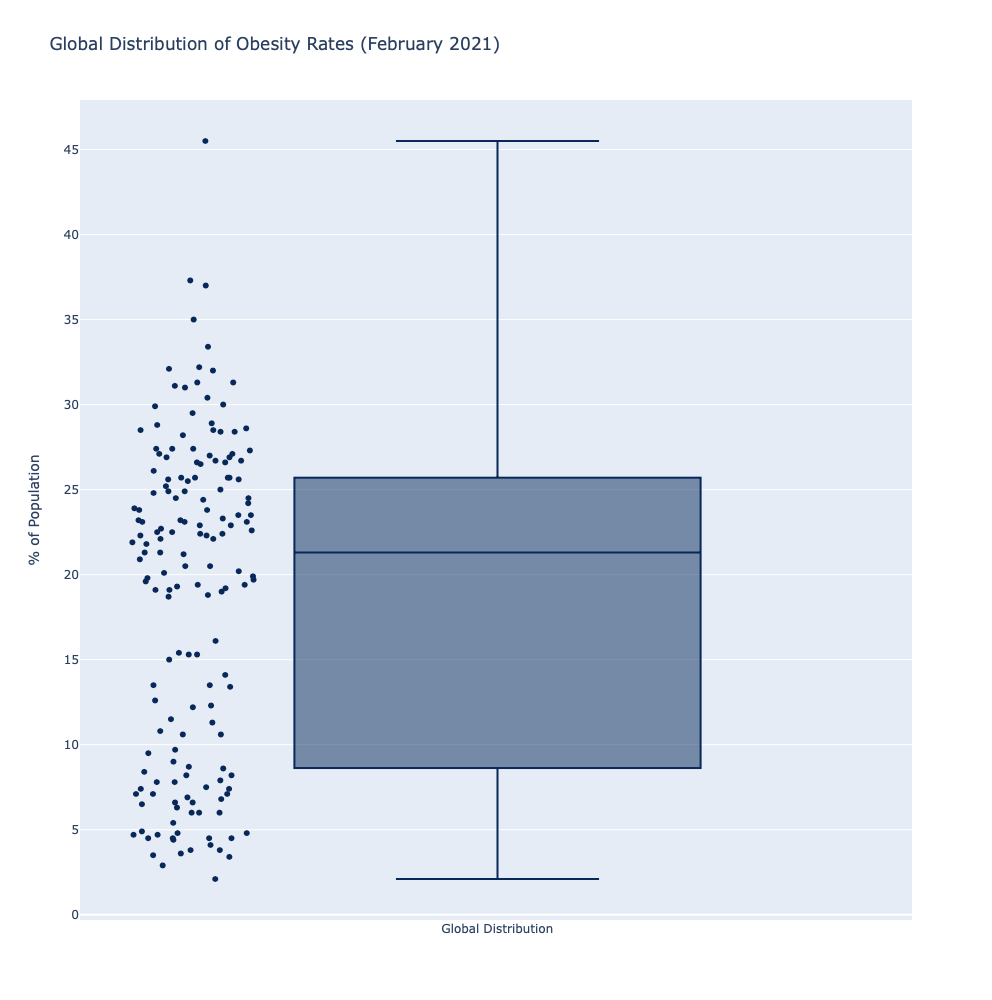


    This chart shows the distribution of obesity rates for each country with available data.
    The country with the highest obesity rate is Samoa with an obesity rate of 45.5%.
    The country with the lowest obesity rate is Vietnam with an obesity rate of 2.1%
    
Shapiro-Wilk Test - Statistic: 0.9384480714797974, p-value: 1.6983335626719054e-06
Mean: 18.70122699386503
Median: 21.3
Range: 43.4
The variance for obesity is 88.20306597914862
The standard deviation for obesity is 9.391648735932824
Roughly 68% of the data is between 9.31 and 28.093
Roughly 95% of the data is between -0.082 and 37.485
Roughly 99.7% of the data is between -9.474 and 46.876


In [21]:
###ANTHONY CODE
##Analysis of Obesity data
obesity_fig = go.Figure()

obesity_fig.add_trace(go.Box(
    y=obesity, 
    customdata=fat_data["Country"],
    boxpoints='all',
    marker_color='rgb(7,40,89)',
    line_color='rgb(7,40,89)',
    hovertemplate='Country: %{customdata}<br>Obesity %{y}%<br>',
))

obesity_fig.update_layout(width=1000, height=1000, 
                  title="Global Distribution of Obesity Rates (February 2021)", 
                  yaxis_title="% of Population")

obesity_fig.update_traces(name='Global Distribution')

obesity_fig.show()
print("""
    This chart shows the distribution of obesity rates for each country with available data.
    The country with the highest obesity rate is Samoa with an obesity rate of 45.5%.
    The country with the lowest obesity rate is Vietnam with an obesity rate of 2.1%
    """)

##Normality Test
shapiro_test_stat, shapiro_p_value = stats.shapiro(obesity)
print(f"Shapiro-Wilk Test - Statistic: {shapiro_test_stat}, p-value: {shapiro_p_value}")

##Summary Stats for obesity
mean_obesity = np.mean(obesity)
median_obesity = np.median(obesity)
mode_obesity = stats.mode(obesity)
range_obesity = np.ptp(obesity)


print(f"Mean: {mean_obesity}")
print(f"Median: {median_obesity}")
print(f"Range: {range_obesity}")

##Calculate the variance and standard deviation for Obesity
var_numpy = np.var(obesity,ddof = 0)
sd_numpy = np.std(obesity,ddof = 0)

print(f"The variance for obesity is {var_numpy}")
print(f"The standard deviation for obesity is {sd_numpy}")
print(f"Roughly 68% of the data is between {round(gaverage_obesity-sd_numpy,3)} and {round(gaverage_obesity+sd_numpy,3)}")
print(f"Roughly 95% of the data is between {round(gaverage_obesity-2*sd_numpy,3)} and {round(gaverage_obesity+2*sd_numpy,3)}")
print(f"Roughly 99.7% of the data is between {round(gaverage_obesity-3*sd_numpy,3)} and {round(gaverage_obesity+3*sd_numpy,3)}")

In [ ]:
###SOWMYA CODE


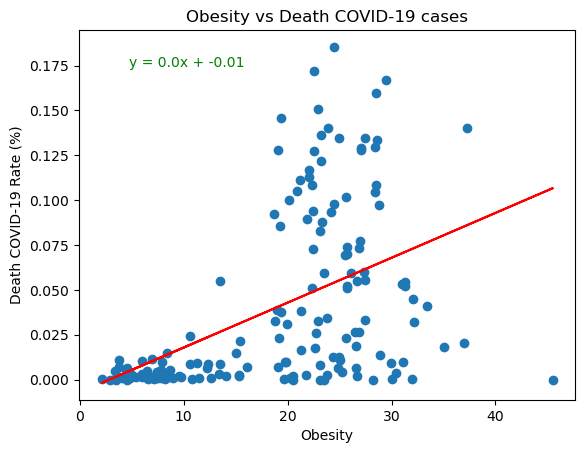

The r-squared is: 0.23336324865036365


6.53050417482799e-11

In [24]:
###KATTY CODE
##Create rough scatterplot showing relationship between obesity and covid death rate
# Clean data by removing NaN values
df_cleaned = df.dropna(subset=['Obesity', 'Deaths'])
x_values = df_cleaned['Obesity']
y_values = calorie_data.loc[df_cleaned.index, 'Deaths']
#Plot scatter plot
plt.scatter(x_values, y_values)
plt.title("Obesity vs Death COVID-19 cases")
plt.xlabel("Obesity")
plt.ylabel("Death COVID-19 Rate (%)")
#Add some regression analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, xy=(0.1, 0.9), xycoords='axes fraction', fontsize=10, color='green')
plt.plot(x_values,regress_values,"r-")
plt.legend
plt.show()
print(f"The r-squared is: {rvalue**2}")
pvalue

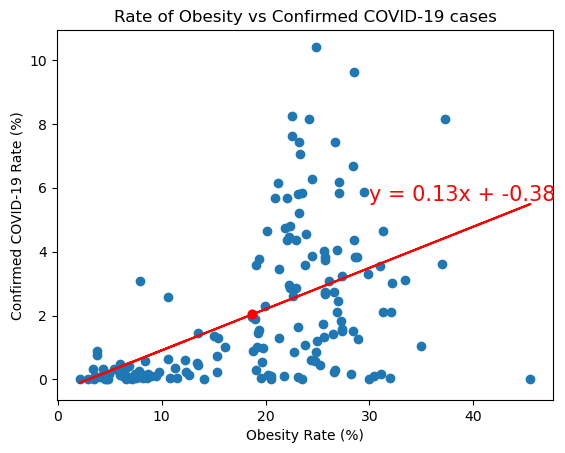

The r-squared is: 0.2647980987594157


2.1135787386808824e-12

In [11]:
##Create rough scatterplot showing relationship between obesity and covid
x_values = fat_data["Obesity"]
y_values = fat_data["Confirmed"]
plt.scatter(x_values, y_values)
plt.title("Rate of Obesity vs Confirmed COVID-19 cases")
plt.xlabel("Obesity Rate (%)")
plt.ylabel("Confirmed COVID-19 Rate (%)")

#Add some regression analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.plot(gaverage_obesity, gaverage_confirmed, marker="o", color="red")

plt.annotate(line_eq,(30,5.6),fontsize=15,color="red")


##Add global average values to plot
plt.plot(gaverage_obesity, gaverage_confirmed, marker="o", color="red")

plt.show()

print(f"The r-squared is: {rvalue**2}")

pvalue

The r-squared is: 0.09273011034365727


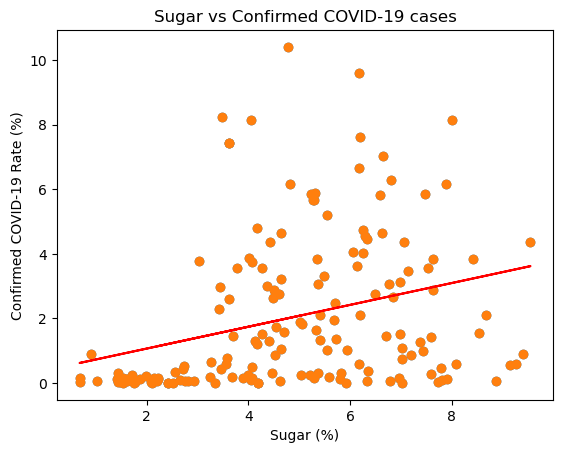

7.744856005577631e-05

In [12]:
##Create rough scatterplot showing relationship between sugar and covid
x_values = calorie_data["Sugar & Sweeteners"]
y_values = calorie_data['Confirmed']
plt.scatter(x_values, y_values)
plt.title("Sugar vs Confirmed COVID-19 cases")
plt.xlabel("Sugar")
plt.ylabel("Confirmed COVID-19 Rate (%)")

##Add global average values to plot


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Sugar (%)")
plt.ylabel("Confirmed COVID-19 Rate (%)")
print(f"The r-squared is: {rvalue**2}")

plt.show()
pvalue



<Axes: >

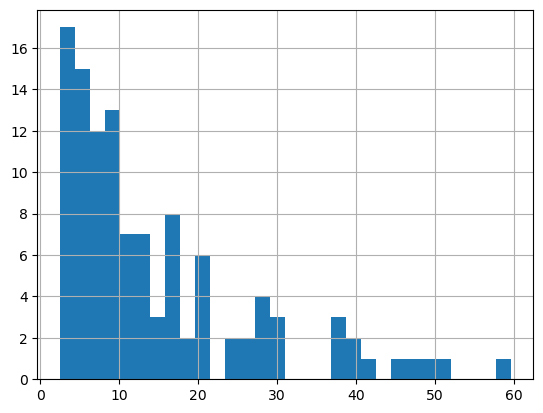

In [14]:
df["Undernourished"].hist(bins=30)

AttributeError: 'Line2D' object has no attribute 'get_xy'

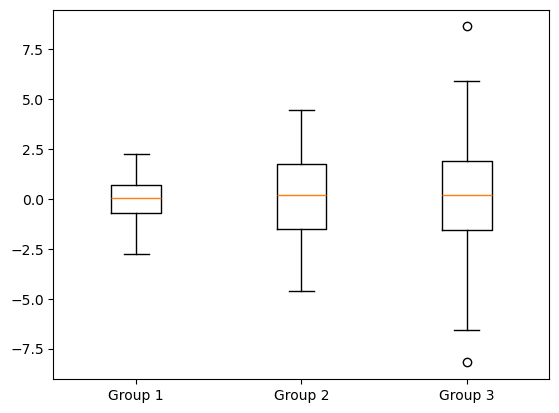

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
data = [np.random.normal(0, 1, 100), np.random.normal(0, 2, 100), np.random.normal(0, 3, 100)]

# Create a boxplot
boxplot_dict = plt.boxplot(data, labels=['Group 1', 'Group 2', 'Group 3'])

# Display boxplot statistics on the chart
for i, box in enumerate(boxplot_dict['boxes']):
    x, y = box.get_xy()
    width = box.get_width()
    height = box.get_height()

    # Display mean, median, and quartiles
    mean_val = np.mean(data[i])
    median_val = np.median(data[i])
    q1_val = np.percentile(data[i], 25)
    q3_val = np.percentile(data[i], 75)

    # Add annotations
    annotation_text = f"Mean: {mean_val:.2f}\nMedian: {median_val:.2f}\nQ1: {q1_val:.2f}\nQ3: {q3_val:.2f}"

    plt.annotate(annotation_text, xy=(x + width / 2, y + height + 0.1),
                 horizontalalignment='center', verticalalignment='bottom', color='black', fontsize=8)

# Set plot labels and title
plt.xlabel('Groups')
plt.ylabel('Values')
plt.title('Boxplot with Annotations')

# Show the plot
plt.show()
